In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from utils.task_config import task_config
from utils.response_standardization import standardize_classification_response
from analysis_utils.load_scores import *

collection_task = (("individual", "paws-x"), ("xglue", "xnli"), 
                   ("superglue", "copa"), ("individual", "belebele"))

# accuracies

#### main accuracies 

In [2]:
all_scores, em = accuracy_benchmarks(combine=True, response_mapping=True)
print(pd.DataFrame(em))

               paws-x   xnli  copa  belebele
en              75.55  43.67  84.4     85.89
en-paraphrase   67.55  53.49  82.2       NaN
de_from_en      64.30  50.00  85.6     81.22
it_from_en      75.10  56.35  86.6     81.00
nl_from_en      71.85  50.92  83.4     79.00
sv_from_en      55.90  46.97  89.2     79.11


In [3]:
# average
pd.DataFrame(em).mean(axis=1)

en               72.377500
en-paraphrase    67.746667
de_from_en       70.280000
it_from_en       74.762500
nl_from_en       71.292500
sv_from_en       67.795000
dtype: float64

#### accuracies en 2nd run

In [4]:
_, em_en_2nd_run = accuracy_benchmarks_second_run(response_mapping=True)

In [5]:
display(em_en_2nd_run)

{'paws-x': {'en_2nd_run': 74.7},
 'xnli': {'en_2nd_run': 43.89},
 'copa': {'en_2nd_run': 85.6},
 'belebele': {'en_2nd_run': 85.78}}

#### accuracies for external translations

In [6]:
all_scores, em = accuracy_benchmarks(combine=False, response_mapping=True, external=True)
display(pd.DataFrame(em))

,paws-x,xnli,copa,belebele
de,57.75,47.94,NaN,80.78
it,NaN,NaN,86.2,77.89
nl,NaN,NaN,NaN,77.00
sv,NaN,NaN,NaN,78.00


#### accuracies ablations

In [28]:
# translate instruction only, keep english task data
all_scores, em = accuracy_benchmarks(combine=False, response_mapping=True, ablation="task")
display(pd.DataFrame(em))

,paws-x,xnli,copa,belebele
en,75.55,43.67,84.4,85.89
en-paraphrase,71.80,54.23,88.2,87.44
de_from_en,62.45,49.24,88.0,86.22
it_from_en,72.80,57.19,91.0,86.00
nl_from_en,68.70,48.10,86.4,85.00
sv_from_en,59.10,48.26,93.0,85.56


In [29]:
# translate task only, keep english instruction
all_scores, em = accuracy_benchmarks(combine=True, response_mapping=True, ablation="instruction")
display(pd.DataFrame(em))

,paws-x,xnli,copa,belebele
en,75.55,43.67,84.4,85.89
en-paraphrase,69.70,44.49,80.6,NaN
de_from_en,78.65,37.96,82.6,80.00
it_from_en,76.75,38.42,81.8,78.00
nl_from_en,78.85,36.83,84.8,79.22
sv_from_en,76.10,37.07,81.4,79.78


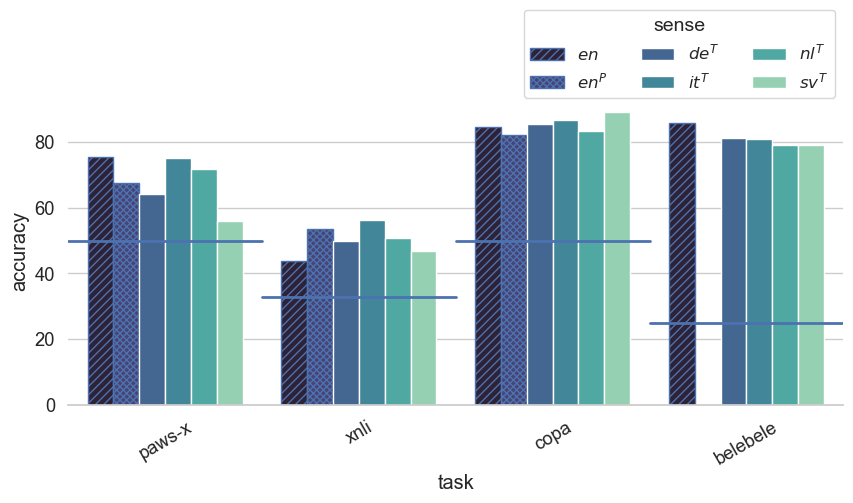

In [22]:
# accuracy plot: main results

all_scores, em = accuracy_benchmarks(combine=True, response_mapping=True)

acc_df = make_df_from_table(em, score="accuracy")
tasks = acc_df['task'].unique()
n_tasks = len(tasks)

baseline_accuracies={
    'paws-x': 50,
    'xnli': 33,
    'copa': 50,
    'belebele': 25
}

figsize=(10,4)

sns.set(font_scale=1.2)
sns.set_style("whitegrid")
plt.figure(figsize=figsize)
p = sns.color_palette('mako') 
ax = sns.barplot(data=acc_df, y="accuracy", x="task", hue="language", palette=p) #"muted")#, alpha=0.5, size=10, marker="o")
plt.xticks(ticks=range(n_tasks), 
           labels=tasks, 
           rotation=30)

sns.despine(left=True, right=True, top=True, bottom=False)

# Update the hatches
for i, bars in enumerate(ax.containers):
    for bar in bars:
        if i%6 == 0:
            bar.set_hatch('////')
            bar.set_edgecolor('b')
        elif i%6 == 1:
            bar.set_hatch(5*'x')
            bar.set_edgecolor('b')

# Insert chance accuracies
for i, task in enumerate(tasks):
    xmin = i/n_tasks
    xmax = xmin+1/n_tasks
    plt.axhline(y=baseline_accuracies[task], xmin=xmin, xmax=xmax, linewidth=2)

handles, labels = ax.get_legend_handles_labels()
labels = ["$en$", "$en^P$", "$de^T$", "$it^T$", "$nl^T$", "$sv^T$"]

legend = ax.legend(handles=handles, labels=labels, title="sense", ncol=3, 
                   loc='upper right', bbox_to_anchor=(1,1.31), fontsize=12)
plt.setp(legend.get_title(), fontsize=14)
plt.show()

# translation quality

In [13]:
all_scores, bleu, number_match = translation_scores(combine=True)
display("bleu", pd.DataFrame(bleu))

'bleu'

,paws-x,xnli,copa,belebele
de_from_en,57.495583,41.902453,NaN,41.086900
it_from_en,NaN,NaN,40.941326,38.137319
nl_from_en,NaN,NaN,NaN,34.280127
sv_from_en,NaN,NaN,NaN,43.981887


In [14]:
# arithmetics: quality of number translations
number_match

{'addition': {'de_from_en': 0.996,
  'it_from_en': 0.892,
  'nl_from_en': 0.994,
  'sv_from_en': 0.81}}

In [15]:
display(pd.DataFrame(all_scores))

,addition,paws-x,xnli,copa,belebele
de_from_en,"{'mean_both': 0.996, 'mean_number1': 1.0, 'mea...","{'comet': 0.8468447437733412, 'bleu': 57.49558...","{'comet': 0.8378808098281929, 'bleu': 41.90245...",NaN,"{'comet': 0.8405325426326857, 'bleu': 41.08689..."
it_from_en,"{'mean_both': 0.892, 'mean_number1': 0.946, 'm...",NaN,NaN,"{'comet': 0.858456480383873, 'bleu': 40.941325...","{'comet': 0.8455306703183386, 'bleu': 38.13731..."
nl_from_en,"{'mean_both': 0.994, 'mean_number1': 1.0, 'mea...",NaN,NaN,NaN,"{'comet': 0.8483672199977769, 'bleu': 34.28012..."
sv_from_en,"{'mean_both': 0.81, 'mean_number1': 0.9, 'mean...",NaN,NaN,NaN,"{'comet': 0.8638584978050656, 'bleu': 43.98188..."


# consistency

#### main consistency scores

In [9]:
C = consistency_benchmarks(combine=True, response_mapping=True)
display(pd.DataFrame(C))

,paws-x,xnli,copa,belebele
en,95.15,95.988024,96.8,97.111111
en-paraphrase,76.50,56.267465,85.2,NaN
de_from_en,74.65,51.177645,88.8,84.666667
it_from_en,82.15,57.524950,85.8,85.111111
nl_from_en,82.40,73.073852,91.0,85.777778
sv_from_en,67.85,82.834331,86.0,83.333333


In [10]:
# average
display(pd.DataFrame(C).mean(axis=1))

en               96.262284
en-paraphrase    72.655822
de_from_en       74.823578
it_from_en       77.646515
nl_from_en       83.062908
sv_from_en       80.004416
dtype: float64

#### consistency ablations

In [36]:
# translate input data only
C_instruction = pd.DataFrame(consistency_benchmarks(combine=True, response_mapping=True, ablation="instruction"))
display(pd.DataFrame(C_instruction))

,paws-x,xnli,copa,belebele
en,95.15,95.988024,96.8,97.111111
en-paraphrase,78.35,86.746507,87.0,NaN
de_from_en,81.10,88.463074,88.6,84.666667
it_from_en,82.00,88.922156,86.2,83.333333
nl_from_en,83.30,88.642715,90.0,86.666667
sv_from_en,80.25,88.642715,87.4,84.888889


In [12]:
# translate instruction only
C_task = pd.DataFrame(consistency_benchmarks(combine=False, response_mapping=True, ablation="task"))
display(pd.DataFrame(C_task))

,paws-x,xnli,copa,belebele
en,95.15,95.988024,96.8,97.111111
en-paraphrase,89.45,63.972056,90.2,94.444444
de_from_en,77.80,57.864271,94.0,94.111111
it_from_en,91.15,60.878244,91.8,94.444444
nl_from_en,86.35,77.924152,93.2,94.111111
sv_from_en,72.65,82.415170,91.0,94.222222


#### consistency external translations

In [38]:
display(pd.DataFrame(consistency_benchmarks(combine=False, response_mapping=True, external=True)))

,paws-x,xnli,copa,belebele
de,69.4,51.876248,NaN,84.222222
it,NaN,NaN,85.4,82.000000
nl,NaN,NaN,NaN,82.222222
sv,NaN,NaN,NaN,81.777778


In [21]:
C_internal = pd.DataFrame(consistency_benchmarks(combine=True, response_mapping=True))
C_external = pd.DataFrame(consistency_benchmarks(combine=False, response_mapping=True, external=True))
differences = []
for task in ["paws-x", "xnli", "copa", "belebele"]:
    differences += list(C_external[task].values - C_internal[task].values[2:])
display(np.round(differences, 2))

array([-5.25,   nan,   nan,   nan,  0.7 ,   nan,   nan,   nan,   nan,
       -0.4 ,   nan,   nan, -0.44, -3.11, -3.56, -1.56])

In [22]:
#PAWS:       74.7 versus 69.4
#XNLI:       51.2 versus 51.9
#COPA:       85.8 versus 85.4
#BELEBELE:   84.7 versus 84.2
#            85.1 versus 82.0
#            85.8 versus 82.2
#            83.3 versus 81.8

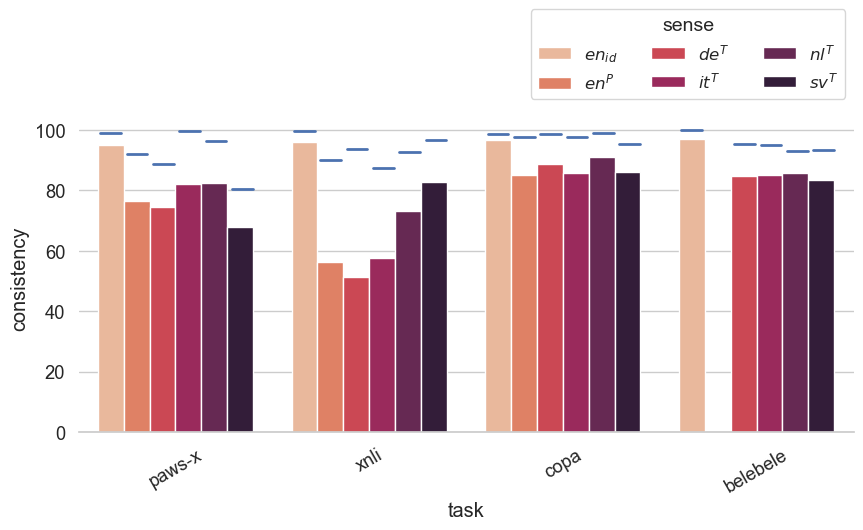

In [23]:
# consistency plot

C = consistency_benchmarks(combine=True, response_mapping=True)
consistency_df = make_df_from_table(C, score="consistency")

plot_tasks = acc_df['task'].unique()
n_tasks = len(tasks)

sns.set(font_scale=1.2)
figsize=(10,4)
n_tasks = len(plot_tasks)
sns.set_style("whitegrid")
plt.figure(figsize=figsize)
p = sns.color_palette('rocket_r') 
ax = sns.barplot(data=consistency_df, y="consistency", x="task", hue="language", palette=p) #"muted")#, alpha=0.5, size=10, marker="o")
plt.xticks(ticks=range(n_tasks), 
           labels=plot_tasks,
           rotation=30)

sns.despine(left=True, right=True, top=True, bottom=False)

# Loop over df to add upper- and lower accuracy lines
linecolor='white'   # Find correct RGB, beige may be nicer
bar_width = ax.patches[0].get_width()/n_tasks

# get bar x coordinates
bar_coords = []
for bar in ax.patches:
    bar_coords.append(bar.get_x()/figsize[1])

for i, task in enumerate(plot_tasks):
    # Get base accuracy
    acc_base = acc_df[(acc_df['task']==task) & (acc_df['language'] == 'en')]['accuracy'].iloc[0]
    for j, language in enumerate(consistency_df['language'].unique()):
        if language == 'en':
            acc2 = {'paws-x': 74.7, 'xnli': 43.89, 'copa': 85.6, 'belebele': 85.78}[task]
        else:
            try:
                acc2 = acc_df[(acc_df['task']==task) & (acc_df['language'] == language)]['accuracy'].iloc[0]
            except:
                continue

        # Compute values and plot them
        # NB this is an overestimation which assumes that 
        # Answers that are both wrong are inconsistent
        max_consistency = fully_consistent(acc_base, acc2)
        xmin = 0.028+i/n_tasks+j*bar_width*1.020
        plt.axhline(y=max_consistency, xmin=xmin, xmax=xmin+bar_width*0.8, linewidth=2)

# plt.axhline(y=0.2, xmin=-0.1, xmax=xmin+bar_width, linewidth=2)
handles, labels = ax.get_legend_handles_labels()
labels = ["$en_{id}$", "$en^P$", "$de^T$", "$it^T$", "$nl^T$", "$sv^T$"]

legend = ax.legend(handles=handles, labels=labels, title="sense", ncol=3, 
                   loc='upper right', bbox_to_anchor=(1,1.4), fontsize=12)
plt.setp(legend.get_title(), fontsize=14)
plt.show()

## conditional consistencies 

In [24]:
def get_conditional_consistency(consistency, correct_source):
    
    conditional_consistency = {"task": [], "language": [], "consistency": [], "correct": []}

    
    for collection, task in collection_task:
        
        for language in ["en", "en-paraphrase", "de_from_en", "it_from_en", "nl_from_en", "sv_from_en"]:
            
            try:
                consistency_tmp = consistency[task][language]
                correct_src_tmp = correct_source[task][language]
            except:
                continue
                
            n = len(consistency_tmp)
            
            consistent_correct = np.mean([consistency_tmp[i] for i in range(n) if correct_src_tmp[i]])
            consistent_false = np.mean([consistency_tmp[i] for i in range(n) if not correct_src_tmp[i]])
            
            conditional_consistency["task"] += [task, task]
            conditional_consistency["language"] += [language, language]
            conditional_consistency["consistency"] += [consistent_correct, consistent_false]
            conditional_consistency["correct"] += ["correct", "incorrect"]

    return pd.DataFrame(conditional_consistency)

In [25]:
_, consistent, correct_src, correct_tgt = consistency_benchmarks(response_mapping=True, get_details=True)
conditional_consistency = get_conditional_consistency(consistent, correct_src)
display(conditional_consistency)

Found cached dataset paws-x (C:/Users/Xenia/.cache/huggingface/datasets/paws-x/en/1.1.0/37673404a6de6d0fa2574661e77940d10d3be3bf51bb4f08c8fa079fd56b9755)
Using the latest cached version of the module from C:\Users\Xenia\.cache\huggingface\modules\datasets_modules\datasets\xglue\8566eedecd9ab28e01c051c023dadf97bf408e5195f76b06aba70ebd4697ae08 (last modified on Thu Mar  9 12:03:53 2023) since it couldn't be found locally at xglue., or remotely on the Hugging Face Hub.
Found cached dataset xglue (C:/Users/Xenia/.cache/huggingface/datasets/xglue/xnli/1.0.0/8566eedecd9ab28e01c051c023dadf97bf408e5195f76b06aba70ebd4697ae08)
Found cached dataset super_glue (C:/Users/Xenia/.cache/huggingface/datasets/super_glue/copa/1.0.3/bb9675f958ebfee0d5d6dc5476fafe38c79123727a7258d515c450873dbdbbed)
Found cached dataset xcopa (C:/Users/Xenia/.cache/huggingface/datasets/xcopa/it/1.1.0/505fce04b4f84b21d9e0d90c69f2090019d25733bd4cddd061b3ff802856214d)
Found cached dataset belebele (C:/Users/Xenia/.cache/huggin

,task,language,consistency,correct
0,paws-x,en,0.962277,correct
1,paws-x,en,0.918200,incorrect
2,paws-x,en-paraphrase,0.791529,correct
3,paws-x,en-paraphrase,0.683027,incorrect
4,paws-x,de_from_en,0.757776,correct
5,paws-x,de_from_en,0.711656,incorrect
6,paws-x,it_from_en,0.878888,correct
7,paws-x,it_from_en,0.644172,incorrect
8,paws-x,nl_from_en,0.859034,correct
9,paws-x,nl_from_en,0.715746,incorrect


In [26]:
conditional_consistency[conditional_consistency["language"]=="en"]["consistency"].values

array([0.96227664, 0.91820041, 0.9606947 , 0.95924876, 0.98815166,
       0.85897436, 0.98706339, 0.87401575])

In [27]:
sns.set(font_scale=1.4)
all_scores, em = accuracy_benchmarks(combine=True, response_mapping=True)

In [28]:
display(pd.DataFrame(em))

def max_consistencies(acc1, acc2):
    # Compute the maximal consistencies for
    # correct and incorrect examples, given
    # the accuracies
    max_correct = (acc1 - max(acc1 - acc2, 0)) / acc1
    incor_en, incor_other = 100-acc1, 100-acc2
    max_incorrect = (incor_en - max(incor_en - incor_other, 0)) / incor_en
    return max_correct, max_incorrect

# Compute this per task
upper_bounds = {}
for task, results in em.items():
    upper_bounds[task] = {}
    incorr = []
    corr = []
    for sense in ['en-paraphrase', 'de_from_en', 'it_from_en', 'nl_from_en', 'sv_from_en']:
        if not (sense=="en-paraphrase" and task=="belebele"):
            max_corr, max_incorr = max_consistencies(results['en'], results[sense])
            incorr.append(max_incorr)
            corr.append(max_corr)
    upper_bounds[task] = {'incorrect': sum(incorr)/len(incorr), 'correct': sum(corr)/len(corr)}      

display(em)
display(upper_bounds)

,paws-x,xnli,copa,belebele
en,75.55,43.67,84.4,85.89
en-paraphrase,67.55,53.49,82.2,NaN
de_from_en,64.30,50.00,85.6,81.22
it_from_en,75.10,56.35,86.6,81.00
nl_from_en,71.85,50.92,83.4,79.00
sv_from_en,55.90,46.97,89.2,79.11


{'paws-x': {'en': 75.55,
  'en-paraphrase': 67.55,
  'de_from_en': 64.3,
  'it_from_en': 75.1,
  'nl_from_en': 71.85,
  'sv_from_en': 55.9},
 'xnli': {'en': 43.67,
  'en-paraphrase': 53.49,
  'de_from_en': 50.0,
  'it_from_en': 56.35,
  'nl_from_en': 50.92,
  'sv_from_en': 46.97},
 'copa': {'en': 84.4,
  'en-paraphrase': 82.2,
  'de_from_en': 85.6,
  'it_from_en': 86.6,
  'nl_from_en': 83.4,
  'sv_from_en': 89.2},
 'belebele': {'en': 85.89,
  'de_from_en': 81.22,
  'it_from_en': 81.0,
  'nl_from_en': 79.0,
  'sv_from_en': 79.11}}

{'paws-x': {'incorrect': 1.0, 'correct': 0.886035737921906},
 'xnli': {'incorrect': 0.8601810758033019, 'correct': 1.0},
 'copa': {'incorrect': 0.8948717948717952, 'correct': 0.9924170616113746},
 'belebele': {'incorrect': 1.0, 'correct': 0.9323844452206311}}

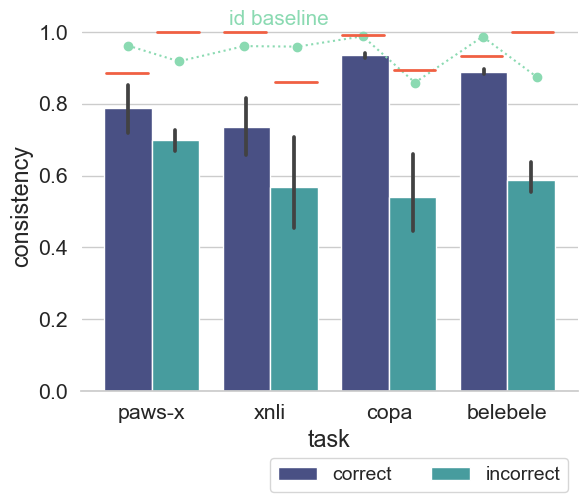

In [29]:
colors = sns.color_palette("mako", n_colors=6)
color1=colors[0]
color2=colors[5]

colors = sns.color_palette('rocket_r', n_colors=2)
line_color = colors[0]

sns.set_style('whitegrid')

#plt.figure(figsize=(6,4))
xvals = [-0.20, 0.23, 0.78, 1.23, 1.78, 2.22, 2.79, 3.25]
ax1 = sns.barplot(data=conditional_consistency[conditional_consistency["language"]!="en"], x="task", y="consistency", hue="correct", palette="mako")
ax3 = plt.plot(xvals, conditional_consistency[conditional_consistency["language"]=="en"]["consistency"].values, linestyle="dotted", marker='o', color=color2)

# Add max consistencies
for i, task in enumerate(em):
    for j, condition in enumerate(['correct', 'incorrect']):
        xmin = 0.05 + i/4.2 + j*0.103
        xmax = xmin+1/12
        plt.axhline(y=upper_bounds[task][condition], xmin=xmin, xmax=xmax, linewidth=2, color=line_color)

plt.yticks([0,0.2, 0.4, 0.6, 0.8, 1])

sns.despine(left=True, right=True, top=True, bottom=False)

legend = plt.legend(fontsize="small", bbox_to_anchor=(1,-.3), loc='lower right', ncol=2)
plt.setp(legend.get_title(),fontsize='small')
plt.text(0.65, 1.02, "id baseline", fontsize=15, color=color2)
plt.ylim(0, 1.03)
plt.show()

### translation quality and consistency

In [32]:
languages = ["de_from_en", "it_from_en", "nl_from_en", "sv_from_en"]
collection_task = (("individual", "paws-x"),("xglue", "xnli"),("superglue", "copa"),("individual", "belebele"))

In [33]:
_, all_consistencies, _, _ = consistency_benchmarks(combine=True, response_mapping=True, get_details=True) 

Found cached dataset paws-x (C:/Users/Xenia/.cache/huggingface/datasets/paws-x/en/1.1.0/37673404a6de6d0fa2574661e77940d10d3be3bf51bb4f08c8fa079fd56b9755)
Found cached dataset xglue (C:/Users/Xenia/.cache/huggingface/datasets/xglue/xnli/1.0.0/8566eedecd9ab28e01c051c023dadf97bf408e5195f76b06aba70ebd4697ae08)
Found cached dataset super_glue (C:/Users/Xenia/.cache/huggingface/datasets/super_glue/copa/1.0.3/bb9675f958ebfee0d5d6dc5476fafe38c79123727a7258d515c450873dbdbbed)
Found cached dataset xcopa (C:/Users/Xenia/.cache/huggingface/datasets/xcopa/it/1.1.0/505fce04b4f84b21d9e0d90c69f2090019d25733bd4cddd061b3ff802856214d)
Found cached dataset belebele (C:/Users/Xenia/.cache/huggingface/datasets/facebook___belebele/eng_Latn/0.0.0/852757217bbf13c7b09f4695aa12adc4104bb53c8bae89cb54637962d625832c)


In [34]:
from scipy.stats import pearsonr

In [35]:
threshold = 0.85
combine_data = True
load_name = "translation_scores_combined.pkl"
comet_scores = {"paws-x": {}, "xnli": {}, "copa": {}, "belebele": {}}
correlations = {"paws-x": {}, "xnli": {}, "copa": {}, "belebele": {}}
threshold_consistency = {"paws-x": {}, "xnli": {}, "copa": {}, "belebele": {}}

for collection, task in collection_task:
    for language in languages:
        path_translations = ("translations/task/" + collection + "_" + task + 
                            "/temp-0.2_topp-1.0_maxt-2048/combined_" + str(combine_data) 
                             + "/" + language + "/")
        try:
            with open(path_translations + load_name, "rb") as f:
                comet_all = pickle.load(f)["comet_all"]["scores"]
        except:
            continue  
        n = len(comet_all)
        comet_scores[task][language] = comet_all
        consistencies = [int(c) for c in all_consistencies[task][language]]
        correlations[task][language] = pearsonr(comet_all, y=consistencies)
        print(task, language, "proportion", np.sum(np.array(comet_all)>threshold)/n)
        threshold_consistency[task][language] = np.mean([consistencies[i] for i in range(n) if comet_all[i] > threshold])

paws-x de_from_en proportion 0.5725
xnli de_from_en proportion 0.5081836327345309
copa it_from_en proportion 0.632
belebele de_from_en proportion 0.4711111111111111
belebele it_from_en proportion 0.5444444444444444
belebele nl_from_en proportion 0.6411111111111111
belebele sv_from_en proportion 0.79


#### correlation between consistency and translation quality

In [36]:
correlations

{'paws-x': {'de_from_en': PearsonRResult(statistic=0.11019461640265332, pvalue=7.81134674306328e-07)},
 'xnli': {'de_from_en': PearsonRResult(statistic=-0.06161852020477984, pvalue=1.2741300623033925e-05)},
 'copa': {'it_from_en': PearsonRResult(statistic=0.07405158541594925, pvalue=0.09813343154474194)},
 'belebele': {'de_from_en': PearsonRResult(statistic=0.13126631718543644, pvalue=7.827591905897604e-05),
  'it_from_en': PearsonRResult(statistic=0.11083047813127797, pvalue=0.0008667181443522709),
  'nl_from_en': PearsonRResult(statistic=0.07881100098507429, pvalue=0.01804355694570104),
  'sv_from_en': PearsonRResult(statistic=0.21205580922896963, pvalue=1.3096070999163288e-10)}}

#### consistency on thresholded data subset

In [37]:
# threshold 0.85
threshold_consistency

{'paws-x': {'de_from_en': 0.7737991266375546},
 'xnli': {'de_from_en': 0.4913589945011783},
 'copa': {'it_from_en': 0.8734177215189873},
 'belebele': {'de_from_en': 0.8702830188679245,
  'it_from_en': 0.8387755102040816,
  'nl_from_en': 0.8613518197573656,
  'sv_from_en': 0.8481012658227848}}

In [38]:
# threshold: 0.85
consistency_orig = np.array([74.65, 51.18, 85.8, 84.67, 85.11, 85.78, 83.33])
consistency_thresholded = np.array([77.38, 49.14, 87.34, 87.03, 83.88, 86.14, 84.81])
print(np.min(consistency_orig-consistency_thresholded), np.max(consistency_orig-consistency_thresholded))

-2.7299999999999898 2.039999999999999


In [39]:
from scipy.stats import ttest_ind as ttest

ttest(consistency_orig, consistency_thresholded)

Ttest_indResult(statistic=-0.10485114895906371, pvalue=0.9182261034403543)

In [40]:
# OLD 
# threshold: 0.8
#threshold_consistency
#{'paws-x': {'de_from_en': 0.765906362545018},
# 'xnli': {'de_from_en': 0.500395256916996},
# 'copa': {'it_from_en': 0.8697788697788698},
# 'belebele': {'de_from_en': 0.8510131108462455,
#  'it_from_en': 0.8514970059880239,
#  'nl_from_en': 0.8610129564193169,
#  'sv_from_en': 0.8482352941176471}}

# threshold: 0.8
print("min", np.min([74.65-76.59, 51.18-50.04, 85.8-86.98, 84.67-85.10, 85.11-85.14,85.78-86.10,83.33-84.82]))
print("max", np.max([74.65-76.59, 51.18-50.04, 85.8-86.98, 84.67-85.10, 85.11-85.14,85.78-86.10,83.33-84.82]))

min -1.9399999999999977
max 1.1400000000000006
